In [1]:
import pandas as pd
data = pd.read_csv('Student Depression Dataset.csv')
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [3]:
data = data.dropna()

In [4]:
data['Profession'].unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

In [5]:
data['Profession'].value_counts()

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [6]:
data = data[data['Profession'] == 'Student']
data['Profession'].value_counts()

Profession
Student    27867
Name: count, dtype: int64

In [7]:
data['Work Pressure'].value_counts()

Work Pressure
0.0    27864
5.0        2
2.0        1
Name: count, dtype: int64

In [8]:
data = data.drop(['Work Pressure'], axis=1)
data = data.drop(['Job Satisfaction'], axis=1)

In [9]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [10]:
print(data.groupby('Gender')['Depression'].mean())

Gender
Female    0.584083
Male      0.586038
Name: Depression, dtype: float64


In [11]:
data['Age'].value_counts()

Age
24.0    2255
20.0    2236
28.0    2129
29.0    1946
33.0    1892
25.0    1781
21.0    1723
23.0    1641
18.0    1587
19.0    1560
34.0    1467
27.0    1461
31.0    1425
32.0    1257
22.0    1159
26.0    1154
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

In [12]:
data = data[data['Age'] <= 34]
data['Age'].value_counts()

Age
24.0    2255
20.0    2236
28.0    2129
29.0    1946
33.0    1892
25.0    1781
21.0    1723
23.0    1641
18.0    1587
19.0    1560
34.0    1467
27.0    1461
31.0    1425
32.0    1257
22.0    1159
26.0    1154
30.0    1145
Name: count, dtype: int64

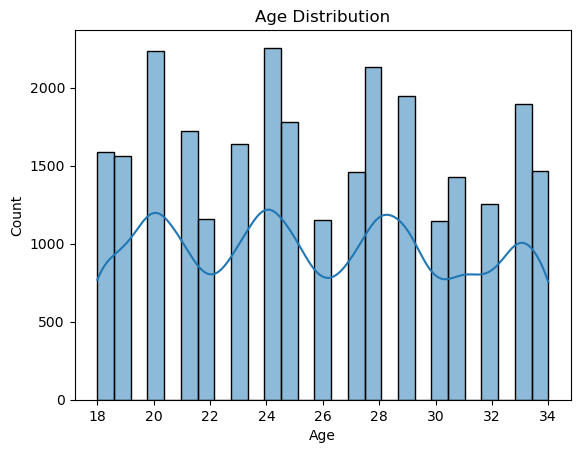

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [14]:
correlation_matrix = data[['Academic Pressure', 'Study Satisfaction', 'CGPA', 'Depression']].corr()
print(correlation_matrix)

                    Academic Pressure  Study Satisfaction      CGPA  \
Academic Pressure            1.000000           -0.111337 -0.022570   
Study Satisfaction          -0.111337            1.000000 -0.044878   
CGPA                        -0.022570           -0.044878  1.000000   
Depression                   0.474982           -0.168359  0.022590   

                    Depression  
Academic Pressure     0.474982  
Study Satisfaction   -0.168359  
CGPA                  0.022590  
Depression            1.000000  


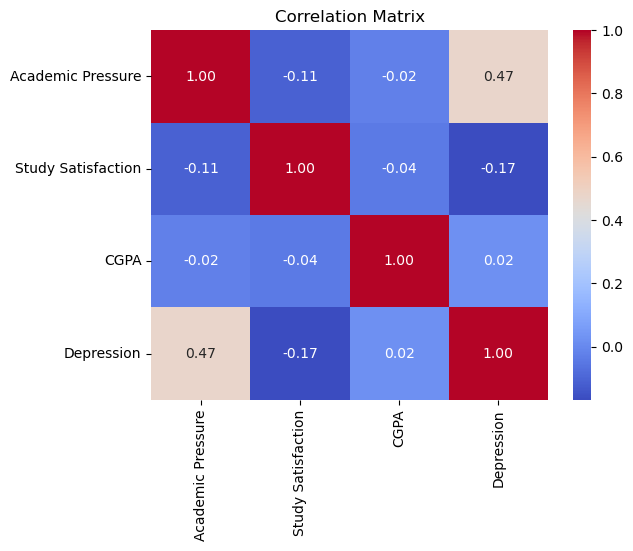

In [15]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
print(data.groupby('Depression')['Academic Pressure'].mean())
print(data.groupby('Depression')['Study Satisfaction'].mean())
print(data.groupby('Depression')['CGPA'].mean())

Depression
0    2.361073
1    3.692709
Name: Academic Pressure, dtype: float64
Depression
0    3.216158
1    2.751013
Name: Study Satisfaction, dtype: float64
Depression
0    7.617387
1    7.684794
Name: CGPA, dtype: float64


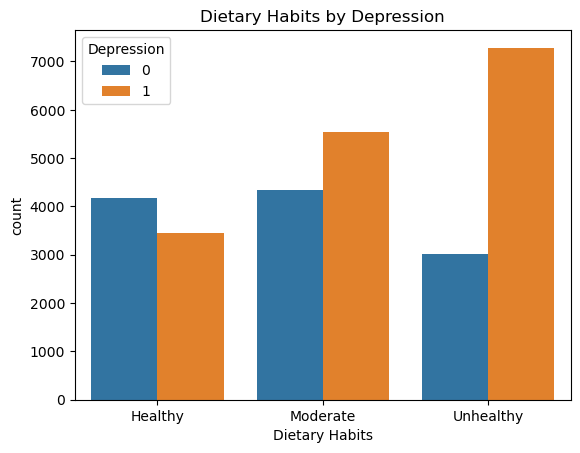

In [17]:
data = data[data['Dietary Habits'] != 'Others']
sns.countplot(x='Dietary Habits', hue='Depression', data=data)
plt.title('Dietary Habits by Depression')
plt.show()

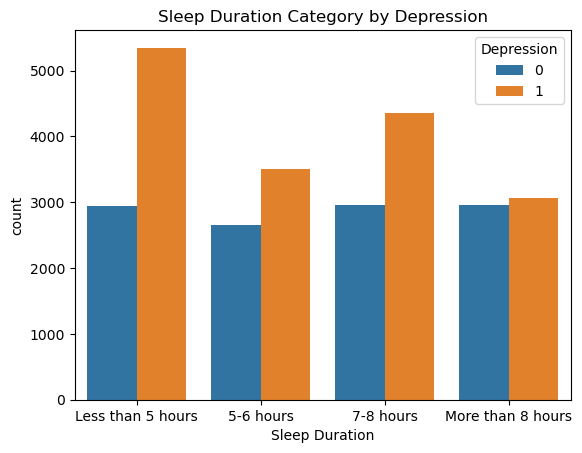

In [18]:
data = data[data['Sleep Duration'] != 'Others']
custom_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sns.countplot(x='Sleep Duration', hue='Depression', data=data, order=custom_order )
plt.title('Sleep Duration Category by Depression')
plt.show()
